# This notebook will explain how to open, interact with and plot data from a Sentinel 5 netCDF file

### Import the needed libraries

In [612]:
import netCDF4
import xarray as xr
import pandas as pd
import geopandas as gpd
import plotly.graph_objects as go
import plotly.express as px
import numpy as np

### Set a variable to store the path to the netCDF file you want to analyze

In [613]:
path = r"/Users/kevinboyle/Downloads/S5P_NRTI_L2__NO2____20200420T041948_20200420T042448_13049_01_010302_20200420T045750-2.nc"

### Load in the dataset and store it in a variable. the xarray dataset prints out a neatly formatted view of the data attributes

In [542]:
dataset = netCDF4.Dataset(path)

In [543]:
xarrayData = xr.open_dataset(path)

In [7]:
xarrayData

<xarray.Dataset>
Dimensions:  ()
Data variables:
    *empty*
Attributes:
    Conventions:                        CF-1.7
    institution:                        KNMI
    source:                             Sentinel 5 precursor, TROPOMI, space-...
    history:                            2020-04-20 05:00:09 f_s5pops tropnll2...
    summary:                            TROPOMI/S5P NO2 1-Orbit L2 Swath 7x3.5km
    tracking_id:                        fe726e65-9ce1-4ab3-8d20-bf0489428f01
    id:                                 S5P_NRTI_L2__NO2____20200420T041948_2...
    time_reference:                     2020-04-20T00:00:00Z
    time_reference_days_since_1950:     25677
    time_reference_julian_day:          2458959.5
    time_reference_seconds_since_1970:  1587340800
    time_coverage_start:                2020-04-20T04:19:43Z
    time_coverage_end:                  2020-04-20T04:24:54Z
    time_coverage_duration:             PT311.633S
    time_coverage_resolution:           PT0.840S
    orbit:                              13049
    references:                         http://www.tropomi.eu/data-products/n...
    processor_version:                  1.3.2
    keywords_vocabulary:                AGU index terms, http://publications....
    keywords:                           0345 Pollution, Urban and Regional; 0...
    standard_name_vocabulary:           NetCDF Climate and Forecast Metadata ...
    naming_authority:                   nl.knmi
    cdm_data_type:                      Swath
    date_created:                       2020-04-20T04:58:10Z
    creator_name:                       The Sentinel 5 Precursor TROPOMI Leve...
    creator_url:                        http://www.tropomi.eu
    creator_email:                      EOSupport@Copernicus.esa.int
    project:                            Sentinel 5 precursor/TROPOMI
    geospatial_lat_min:                 32.3197
    geospatial_lat_max:                 56.392887
    geospatial_lon_min:                 146.04317
    geospatial_lon_max:                 105.9501
    license:                            No conditions apply
    platform:                           S5P
    sensor:                             TROPOMI
    spatial_resolution:                 7x3.5km2
    cpp_compiler_version:               g++ (GCC) 4.8.5 20150623 (Red Hat 4.8...
    cpp_compiler_flags:                 -g -O2 -fPIC -std=c++11 -W -Wall -Wno...
    f90_compiler_version:               GNU Fortran (GCC) 4.8.5 20150623 (Red...
    f90_compiler_flags:                 -gdwarf-3 -O2 -fPIC -cpp -ffpe-trap=i...
    build_date:                         2019-04-05T12:04:00Z
    revision_control_identifier:        
    geolocation_grid_from_band:         4
    identifier_product_doi:             N/A
    identifier_product_doi_authority:   http://dx.doi.org/
    algorithm_version:                  1.3.0
    title:                              TROPOMI/S5P NO2 1-Orbit L2 Swath 7x3.5km
    processing_status:                  NRTI-processing product
    product_version:                    1.1.0
    Status_MET_2D:                      Nominal
    Status_NISE__:                      Nominal
    Status_CTMFCT:                      Nominal

## The file is split in to two groups; product and metadata. The numerical data is all in the product group. The below figure is from the Sentinel User's Manual.
https://sentinel.esa.int/documents/247904/2474726/Sentinel-5P-Level-2-Product-User-Manual-Cloud

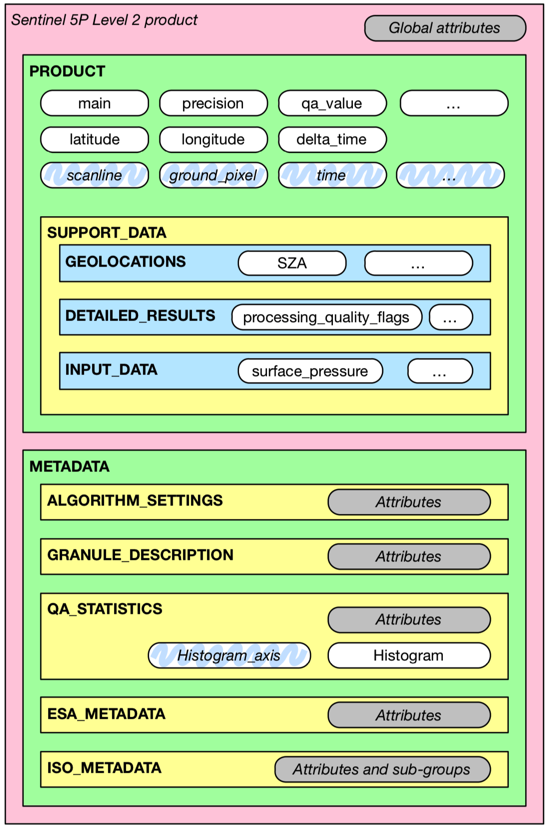

### netCDF4 is object-oriented. So to access the groups, use "dot-notation". The groups are structed as python dictionaries. To access a specific group, use square brackets and string literals as shown below.

In [544]:
dataset.groups.keys()

odict_keys(['PRODUCT', 'METADATA'])

In [175]:
metadata = dataset.groups['METADATA']

In [11]:
product = dataset.groups['PRODUCT']

In [139]:
product.variables.keys()

odict_keys(['scanline', 'ground_pixel', 'time', 'corner', 'polynomial_exponents', 'intensity_offset_polynomial_exponents', 'layer', 'vertices', 'latitude', 'longitude', 'delta_time', 'time_utc', 'qa_value', 'nitrogendioxide_tropospheric_column', 'nitrogendioxide_tropospheric_column_precision', 'nitrogendioxide_tropospheric_column_precision_kernel', 'averaging_kernel', 'air_mass_factor_troposphere', 'air_mass_factor_total', 'tm5_tropopause_layer_index', 'tm5_constant_a', 'tm5_constant_b'])

### The numerical data is stored in three dimensions: Time, Scanline and Ground Pixel. Scanline represents the flight direction and ground pixel represents the direction perpendicular to the flight path, which for this image gives a shape of (1, 372, 450).

In [549]:
product.variables['nitrogendioxide_tropospheric_column']

<class 'netCDF4._netCDF4.Variable'>
float32 nitrogendioxide_tropospheric_column(time, scanline, ground_pixel)
    units: mol m-2
    standard_name: troposphere_mole_content_of_nitrogen_dioxide
    long_name: Tropospheric vertical column of nitrogen dioxide
    coordinates: longitude latitude
    ancillary_variables: nitrogendioxide_tropospheric_column_precision air_mass_factor_troposphere air_mass_factor_total averaging_kernel
    multiplication_factor_to_convert_to_molecules_percm2: 6.02214e+19
    _FillValue: 9.96921e+36
path = /PRODUCT
unlimited dimensions: 
current shape = (1, 372, 450)
filling on

### The coordinates are stored in 3 dimensions and are not natively paired (latitude and longtitude are their own attributes). For example, to get the latitude of the first row / first column index each dimension to zero as python is zero-based.

In [577]:
product.variables['latitude'][0][0][0]

32.364525

### To get all latitude values for a specific row, use the below indexing method. This example shows all latitudes for the first row. It is commented out so the notebook doesnt print all the values. To confirm this are all values for a row, check the length of the array. Since this is a 372 x 450 pixel image, the length for a row should be 450.

In [584]:
#product.variables['latitude'][0,0,:]

In [585]:
len(product.variables['latitude'][0,0,:])

450

### To get all latitude values for a specific column, use the below indexing method. This should give an array with a length of 372 (number of rows).

In [586]:
len(product.variables['latitude'][0,:,0])

372

### In order the get all the latitude and longitude values for the image, the 3D array has be reduced to a 2D array. This can be down in several ways, but an easy way is to use numpy's flatten method. This will create a new arrays with 167,400 values ( 372 x 450).

### The below lines of code create three pandas dataframes, one for lats, one for longs and one for N02. The dataframes are then merged into one.

In [590]:
latDF = pd.DataFrame(np.array(product.variables['latitude']).flatten(), columns=['latitude'])

In [591]:
lonDF = pd.DataFrame(np.array(product.variables['longitude']).flatten(), columns=['longitude'])

In [592]:
N02TropoDF = pd.DataFrame(np.array(product.variables['nitrogendioxide_tropospheric_column']).flatten(), columns = ['N02'])

In [594]:
df = latDF.merge(lonDF, left_index=True, right_index=True)

In [595]:
df = df.merge(N02TropoDF, left_index=True, right_index=True)

### There is now a dataframe containing the values of interest! To check for values, the dataframe length should be 167,400.

In [596]:
len(df)

167400

In [598]:
df.head()

,latitude,longitude,N02
0,32.364525,117.091576,9.969210e+36
1,32.407211,117.178032,2.933390e-04
2,32.449253,117.263390,1.517603e-04
3,32.490669,117.347672,-8.594624e-05
4,32.531471,117.430908,-1.847283e-04


### Using the geopandas library, we can create geodataframe that creates a new column of shapely points. Geopandas is a free python library that performs a lot of useful tasks for spatial data.

https://geopandas.org

In [601]:
geoDF = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude))

In [602]:
geoDF.head()

,latitude,longitude,N02,geometry
0,32.364525,117.091576,9.969210e+36,POINT (117.09158 32.36452)
1,32.407211,117.178032,2.933390e-04,POINT (117.17803 32.40721)
2,32.449253,117.263390,1.517603e-04,POINT (117.26339 32.44925)
3,32.490669,117.347672,-8.594624e-05,POINT (117.34767 32.49067)
4,32.531471,117.430908,-1.847283e-04,POINT (117.43091 32.53147)


### We can now create a map of the N02 values. The below code uses mapbox, which is free on a limited bases depending on the map tiles used. You can get a free token by signing up.
https://www.mapbox.com

In [603]:
token = 'pk.eyJ1Ijoia2V2aW5ib3lsZTc3MTciLCJhIjoiY2s5aWl6enFpMDI3eDNubjJvZWdiMTdzYSJ9.VKSafIe0zsLVMCswKycFyQ'

In [615]:
fig = px.scatter_mapbox(df, 
                        lat=df.latitude, 
                        lon=df.longitude, 
                        color=df.N02, 
                        center=go.layout.mapbox.Center(lat=df.latitude.median(),lon=df.longitude.median()),
                        zoom = 2.5,
                        opacity=.3,
                        color_continuous_scale=px.colors.sequential.Plasma)
                        
#fig.update_layout(mapbox_style='dark', mapbox_accesstoken=token)
#fig.show

### So save your interactive map to html...

In [512]:
fig.write_html('ShanghaiCoverage.html')